c:\Users\dbahe\Downloads\ML_Model_End_To_End\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


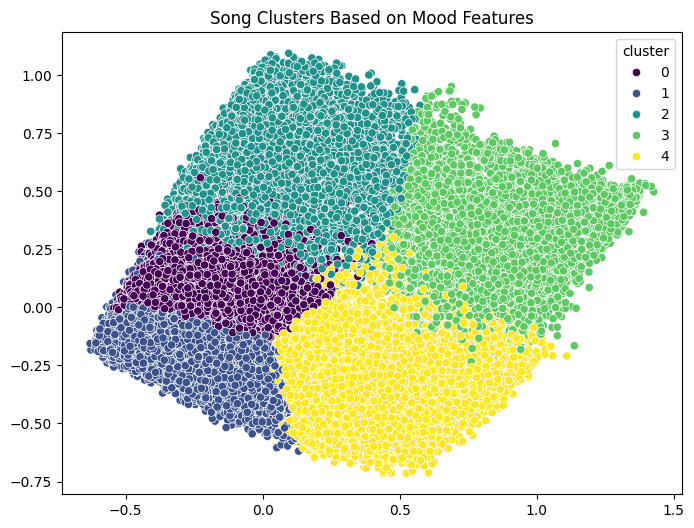

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datasets/dataset.csv')

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

data = df[features]

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

num_clus = 5

kmeans = KMeans(n_clusters=num_clus)
df['cluster'] = kmeans.fit_predict(data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Song Clusters Based on Mood Features')
plt.show()


In [2]:
!pip install python-dotenv
!pip install matplotlib
!pip install seaborn
!pip install yellowbrick
!pip install scipy
!pip install requests
!pip install os
!pip install json


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.2 MB/s eta 0:00:000:00:01m 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
import requests
import os
import json
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv('API_KEY')

df = pd.read_csv('Datasets/dataset.csv')

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

data = df[features]

mood_mapping = {
'sentimental': {'valence': 0.6, 'acousticness': 0.4},
'afraid': {'energy': 0.5, 'loudness': 0.4, 'speechiness': 0.3},
'proud': {'energy': 0.7, 'danceability': 0.5, 'valence': 0.6},
'faithful': {'acousticness': 0.6, 'valence': 0.5},
'terrified': {'energy': 0.8, 'loudness': 0.7},
'joyful': {'danceability': 0.7, 'valence': 0.8},
'angry': {'energy': 0.9, 'loudness': 0.9},
'sad': {'acousticness': 0.7, 'valence': 0.2},
'jealous': {'energy': 0.6, 'speechiness': 0.5},
'grateful': {'acousticness': 0.6, 'valence': 0.7},
'prepared': {'energy': 0.6, 'tempo': 0.7},
'embarrassed': {'speechiness': 0.6, 'loudness': 0.5},
'excited': {'danceability': 0.9, 'energy': 0.8},
'annoyed': {'loudness': 0.7, 'speechiness': 0.6},
'lonely': {'acousticness': 0.7, 'valence': 0.3},
'ashamed': {'acousticness': 0.6, 'speechiness': 0.5},
'guilty': {'acousticness': 0.6, 'valence': 0.4},
'surprised': {'tempo': 0.8, 'energy': 0.6},
'nostalgic': {'acousticness': 0.8, 'valence': 0.5},
'confident': {'energy': 0.7, 'danceability': 0.6},
'furious': {'energy': 0.9, 'loudness': 0.9},
'disappointed': {'valence': 0.3, 'acousticness': 0.6},
'caring': {'acousticness': 0.7, 'valence': 0.6},
'trusting': {'valence': 0.7, 'acousticness': 0.5},
'disgusted': {'speechiness': 0.7, 'loudness': 0.6},
'anticipating': {'tempo': 0.7, 'energy': 0.6},
'anxious': {'energy': 0.6, 'speechiness': 0.5},
'hopeful': {'valence': 0.8, 'danceability': 0.7},
'content': {'valence': 0.6, 'acousticness': 0.6, 'loudness': 0.5},
'impressed': {'energy': 0.7, 'valence': 0.8},
'apprehensive': {'speechiness': 0.6, 'energy': 0.5},
'devastated': {'acousticness': 0.8, 'valence': 0.1, 'danceability': 0.2},
}


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

model = KMeans()

kmeans = KMeans(n_clusters=32, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

centroids = kmeans.cluster_centers_

def match_mood_to_centroid(centroid, mood_thresholds):
    # Initialize weighted score
    weighted_score = 0
    
    # Define feature weights (you can adjust these)
    feature_weights = {
        'valence': 1.5,      # Important for emotional content
        'energy': 1.2,       # Important for mood intensity
        'danceability': 1.0,
        'acousticness': 1.0,
        'loudness': 0.8,
        'speechiness': 0.7,
        'tempo': 0.8,
        'instrumentalness': 0.5,
        'liveness': 0.5
    }
    
    for feature, threshold in mood_thresholds.items():
        if feature in features:  # Check if feature exists
            feature_idx = features.index(feature)
            feature_value = centroid[feature_idx]
            
            # Calculate weighted difference
            difference = abs(feature_value - threshold)
            weight = feature_weights[feature]
            weighted_score += difference * weight
    return weighted_score

cluster_moods = {}
for i, centroid in enumerate(centroids):
    scores = {}
    for mood, thresholds in mood_mapping.items():
        score = match_mood_to_centroid(centroid, thresholds)
        scores[mood] = score
    
    # Get top 3 closest moods for this cluster
    sorted_moods = sorted(scores.items(), key=lambda x: x[1])
    best_mood = sorted_moods[0][0]
    cluster_moods[i] = best_mood
    
    # Print cluster analysis (optional)
    print(f"Cluster {i} assigned to {best_mood} (score: {sorted_moods[0][1]:.3f})")
    print(f"Next best matches: {sorted_moods[1][0]} ({sorted_moods[1][1]:.3f}), {sorted_moods[2][0]} ({sorted_moods[2][1]:.3f})")


'''
def generate_song_for_mood(mood):
    if mood not in cluster_moods.values():
        return "Mood not found"
    for k, v in cluster_moods.items():
        if v == mood:
            cluster_id = k
            break
    song_features = centroids[cluster_id] 
    song_attr = scaler.inverse_transform(song_features.reshape(1, -1))[0]  
    distances = cdist(df[features], song_attr.reshape(1, -1), metric='euclidean').flatten()
    closest_song_idx = distances[:5]
    closest_song = df.iloc[closest_song_idx].sort_values('popularity', ascending=False).head(1)
    return closest_song
'''

def generate_song_for_mood(mood):
    if mood not in mood_mapping:
        return "Mood not found in mapping"
        
    # Find all clusters that match this mood
    matching_clusters = [k for k, v in cluster_moods.items() if v == mood]
    
    if not matching_clusters:
        return "No clusters found for this mood"
        
    # Get the cluster that best represents this mood
    best_cluster = matching_clusters[0]
    song_features = centroids[best_cluster]
    
    # Transform features back to original scale
    song_attr = scaler.inverse_transform(song_features.reshape(1, -1))[0]
    
    # Calculate distances to all songs
    distances = cdist(df[features], song_attr.reshape(1, -1), metric='euclidean').flatten()
    
    # Get indices of 20 closest songs
    closest_indices = np.argsort(distances)[:20]
    
    # Get top 5 most popular songs from these 20
    closest_songs = df.iloc[closest_indices].sort_values('popularity', ascending=False).head(5)
    
    return closest_songs.iloc[0]  # Return the most popular matching song

song = generate_song_for_mood('sad')
print(song['track_name'])

#use google to get the youtube link of the song
url = f"https://www.googleapis.com/youtube/v3/search?part=snippet&maxResults=1&q={song['track_name']}{song['artists']}&key={api_key}"
response = requests.get(url)
link = response.json()['items'][0]['id']['videoId']
print(f"https://www.youtube.com/watch?v={link}")
print(response.json())


Cluster 0 assigned to angry (score: 0.081)
Next best matches: furious (0.081), terrified (0.244)
Cluster 1 assigned to joyful (score: 0.076)
Next best matches: hopeful (0.076), grateful (0.239)
Cluster 2 assigned to terrified (score: 0.164)
Next best matches: excited (0.200), confident (0.220)
Cluster 3 assigned to grateful (score: 0.215)
Next best matches: caring (0.225), joyful (0.250)
Cluster 4 assigned to angry (score: 0.103)
Next best matches: furious (0.103), terrified (0.203)
Cluster 5 assigned to nostalgic (score: 0.068)
Next best matches: faithful (0.268), caring (0.318)
Cluster 6 assigned to confident (score: 0.041)
Next best matches: nostalgic (0.114), terrified (0.119)
Cluster 7 assigned to sentimental (score: 0.232)
Next best matches: faithful (0.249), guilty (0.268)
Cluster 8 assigned to joyful (score: 0.067)
Next best matches: hopeful (0.067), angry (0.138)
Cluster 9 assigned to devastated (score: 0.162)
Next best matches: sad (0.392), embarrassed (0.400)
Cluster 10 assi